In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
im_shape = (250,200)

TRAINING_DIR = '/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/Train'
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/Test/'

seed = 10
BATCH_SIZE = 16

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

sau

In [ ]:
# Generator data train
train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")
# Generator data validation
validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 178 images belonging to 4 classes.
Found 43 images belonging to 4 classes.
Found 71 images belonging to 4 classes.
Classes: ['Cam', 'Chuoi', 'Man', 'ThanhLong']


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(im_shape[0],im_shape[1],3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Compile model

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 99, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 97, 64)       18496     
                                                                 
 flatten (Flatten)           (None, 757376)            0         
                                                                 
 dense (Dense)               (None, 128)               96944256  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
#Training
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=50,
        
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

Epoch 1/50
11/11 [==============================] - 4s 263ms/step - loss: 9.9325 - accuracy: 0.6667 - val_loss: 1.9590 - val_accuracy: 0.7500
Epoch 2/50
11/11 [==============================] - 3s 242ms/step - loss: 0.9719 - accuracy: 0.8519 - val_loss: 0.6016 - val_accuracy: 0.6875
Epoch 3/50
11/11 [==============================] - 3s 250ms/step - loss: 0.2212 - accuracy: 0.9261 - val_loss: 0.3408 - val_accuracy: 0.8750
Epoch 4/50
11/11 [==============================] - 3s 242ms/step - loss: 0.2520 - accuracy: 0.9198 - val_loss: 0.4205 - val_accuracy: 0.8125
Epoch 5/50
11/11 [==============================] - 3s 268ms/step - loss: 0.1706 - accuracy: 0.9630 - val_loss: 0.3922 - val_accuracy: 0.8438
Epoch 6/50
11/11 [==============================] - 3s 242ms/step - loss: 0.1263 - accuracy: 0.9383 - val_loss: 0.3142 - val_accuracy: 0.9375
Epoch 7/50
11/11 [==============================] - 3s 244ms/step - loss: 0.1042 - accuracy: 0.9630 - val_loss: 0.3998 - val_accuracy: 0.9062
Epoch 

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/model_thanhlong.h5')

In [ ]:
model.save('model_thanhlong.h5')

In [ ]:
model5 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/model_thanhlong.h5')

ThanhLong


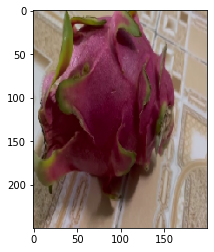

In [ ]:
img=load_img('/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/Test/ThanhLong/ThanhLong_0007.bmp',target_size=(250,200))
image=img
plt.imshow(img)
imgRe=img_to_array(img)
imgRe=imgRe.reshape(1,250,200,3)
imgRe=imgRe.astype('float32')
imgRe/=255

#them
y_pred = model5.predict(imgRe)
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[0]]

np.argmax(y_pred,axis=1)[0]
classes[np.argmax(y_pred,axis=1)[0]]
if(y_classes[0]==3):
  result=1
  print("ThanhLong")
else:
  result=0
  print("Other fruit")

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

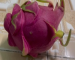

In [ ]:
if result==1: #goc la 1
  #image = cv.imread("56789.jpg")
  #image = cv.imread("/content/drive/MyDrive/Colab Notebooks/Train_AI/Fruit/Test/ThanhLong/2.jpg")
  image = cv.imread("ThanhLong_0006.jpg")
  width, height = int(image.shape[1]*0.3), int(image.shape[0]*0.3)
  resized_img = cv.resize(image, (width, height), interpolation = cv.INTER_AREA,)
  cv2_imshow(resized_img)
else:
  print("other fruit")

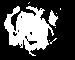

In [ ]:
if result==1:
  ##convert image to HSV
  image_hsv = cv.cvtColor(resized_img,cv.COLOR_BGR2HSV)
  #image_rgb = cv.cvtColor(resized_img,cv.COLOR_BGR2RGB)
# H: (Hue) Vùng màu
# S: (Saturation) Độ bão hòa màu
# B (hay V): (Bright hay Value) Độ sáng
  ##choose color HSV, 
  low_h=150   #10
  high_h=170   #25
  low_s=150   #150
  high_s=255  #255
  low_v=20    #20
  high_v=255  #255

  #binary to image
  b_img = cv.inRange(image_hsv, (low_h, low_s, low_v), (high_h, high_s, high_v))
  #b_img=cv.inRange(image_rgb,(255,192,203),(257,194,205))
  cv2_imshow(b_img)
else:
  print("other fruit")

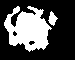

In [ ]:
 # morpho để khử nhiễu
kn = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3)) ##ma tran vuong
m_img = cv.morphologyEx(b_img, cv.MORPH_OPEN, kn, iterations=1)
m_img = cv.morphologyEx(m_img, cv.MORPH_CLOSE, kn, iterations=1)
cv2_imshow(m_img)

In [ ]:
 ## tìm đường số lượng contour
 # function find contours in binary image
 #RETR_EXTERNAL: lay duong bao ngoai
contour, hie = cv.findContours(m_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contour))

2


25


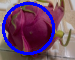

In [ ]:
for c in contour:
  (x, y), radius = cv.minEnclosingCircle(c)
  cirlearea = np.pi * (radius ** 2)
  area = cv.contourArea(c)
  if (1 - area / cirlearea) < 0.4:
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(resized_img, center, radius, (255, 0, 0), 2)
    print(radius)

cv2_imshow(resized_img)

ban kinh qua thanh long= 7.5 mm


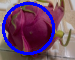

In [ ]:
if result==1:
  for c in contour:
    (x, y), radius = cv.minEnclosingCircle(c)
    cirlearea = np.pi * (radius ** 2)
    area = cv.contourArea(c)
    if (1 - area / cirlearea) < 0.4:
      center = (int(x), int(y))
      radius = int(radius)
      cv.circle(resized_img, center, radius, (255, 0, 0), 2)
      radius1=radius*0.3
      print('ban kinh qua thanh long=',radius*0.3,'mm')
      font = cv.FONT_HERSHEY_SIMPLEX
      org = (120, 120)
      fontScale = 1.5
      color = (0, 255, 0)
      thickness = 2
      text =  ('Dragon Fruit Radius= '+ str(radius*0.3) +' mm')
      cv.putText(resized_img, text ,org, font,fontScale/3, color, thickness, cv.LINE_AA)

  cv2_imshow(resized_img)

In [ ]:
from os import listdir
import cv2
import numpy as np
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
from keras.models import  load_model
import sys


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/Train_AI/thanhlong.mp4")
class_name =['Cam','Chuoi','Man','ThanhLong']
while(True):
    # Capture frame-by-frame
    #
    ret, image_org = cap.read()
    if not ret:
        continue
    image_org = cv2.resize(image_org, dsize=None,fx=0.4,fy=0.4)
    # Resize
    image = image_org.copy()
    image = cv2.resize(image, dsize=(200,250))
    image = image.astype('float')*1./255
    # Convert to tensor
    image = np.expand_dims(image, axis=0)


    # pic = image.load_img('../BAOCAOCUOIKI/test/asagi2.jpg', target_size=(250,200))
    # plt.imshow(pic)
    # pic = img_to_array(pic)
    # pic = pic.reshape(1,250,200,3) 
    # pic = pic.astype('float32')
    # pic = pic/255
    # print(np.argmax(model.predict(pic), axis=1))
    # print(labels)

    # Predict
    predict = model.predict(image)
    print("This picture is: ", class_name[np.argmax(predict[0])])
    #print("This picture is: ", class_name[np.argmax(predict[0])], (predict[0]))
    print(np.max(predict[0],axis=0))
    if (np.max(predict)>=0.8) and (np.argmax(predict[0])!=0):


        # Show image
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (50, 50)
        fontScale = 1.5
        color = (0, 255, 0)
        thickness = 2

        cv2.putText(image_org, class_name[np.argmax(predict)], org, font,
                    fontScale, color, thickness, cv2.LINE_AA)

    #cv2.imshow("Picture", image_org)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: ignored